#### Imports

In [1]:
import pandas as pd
import random
from Perceptron import *
from PerceptronLayer import *
from PerceptronNetwork import *

random.seed(1755920)

#### Maken van een waarheidstabel

In [2]:
def create_table_data(function, expectations):
    """Deze functie berekent de uitkomst van een perceptron/netwerk en geeft dit terug in een goed format"""
    data = []

    for item in expectations:

        output = function(item[0])
        data.append([item[0], output])
    return data


In [3]:
def print_table(data, caption):
    """Deze functie print een waarheidstabel"""

    columns = ['Input', 'Output']

    df = pd.DataFrame.from_records(data, columns=columns)
    print(f'<{caption}>\n {df}\n')
    

#### Uitkomsten testen

In [4]:
def test_outcome(expectation, outcome):
    """Deze functie test of de uitkomst van een perceptron/netwerk hetzelfde is als de verwachting.
    Ik heb gekozen om dit op deze 'assert' manier te doen omdat deze functie nu makkelijk en flexibel aan te roepen is.
    """

    if expectation == outcome:
        print("Test geslaagd - Verwachting & uitkomst hetzelfde")
    else:
        print('Test mislukt - Verwachting & uitkomst niet hetzelfde')

#### Random startwaarden

In [5]:
def generate_random_float():
    return round(random.uniform(-10, 10),1)

def generate_random_list(numbers):
    lst = []
    for item in range(numbers):
        lst.append(generate_random_float())
    return lst


## Testen

#### AND gate
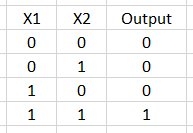

In [11]:
AND = Perceptron('AND', generate_random_float(), generate_random_list(2))
print(AND)

expectations = [[[False, False], False],
                [[False, True], False],
                [[True, False], False],
                [[True, True], True]]
print_table(expectations, 'Verwachting')

output = create_table_data(AND.activation, expectations)
print_table(output, 'Uitkomst')
test_outcome(expectations, output)
print(f'Error = {AND.error(expectations)}\n======================\nUPDATE\n')

AND.update(expectations, 500)
print(AND)
updated_output = create_table_data(AND.activation, expectations)
print_table(updated_output, 'Uitkomst')
test_outcome(expectations, updated_output)
print(f'Error = {AND.error(expectations)}\n======================')

<AND port>
- Bias = 7.7
- Weights = [-0.2, -0.8]

<Verwachting>
             Input  Output
0  [False, False]   False
1   [False, True]   False
2   [True, False]   False
3    [True, True]    True

<Uitkomst>
             Input  Output
0  [False, False]    True
1   [False, True]    True
2   [True, False]    True
3    [True, True]    True

Test mislukt - Verwachting & uitkomst niet hetzelfde
Error = 0.75
UPDATE

<AND port>
- Bias = -0.2999999999999892
- Weights = [0.19999999999999998, 0.09999999999999987]

<Uitkomst>
             Input  Output
0  [False, False]   False
1   [False, True]   False
2   [True, False]   False
3    [True, True]    True

Test geslaagd - Verwachting & uitkomst hetzelfde
Error = 0.0


#### XOR gate
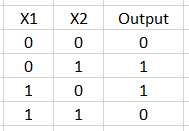




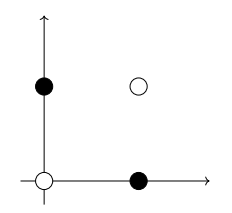

(Niet linear scheidbaar)

In [20]:
XOR = Perceptron('XOR', generate_random_float(), generate_random_list(2))
print(XOR)

expectations = [[[False, False], False],
                [[False, True], True],
                [[True, False], True],
                [[True, True], False]]
print_table(expectations, 'Verwachting')

output = create_table_data(XOR.activation, expectations)
print_table(output, 'Uitkomst')
test_outcome(expectations, output)
print(f'Error = {XOR.error(expectations)}\n======================\nUPDATE\n')

XOR.update(expectations, 5000)
print(XOR)
updated_output = create_table_data(XOR.activation, expectations)
print_table(updated_output, 'Uitkomst')
test_outcome(expectations, updated_output)
print(f'Error = {XOR.error(expectations)}\n======================')

<XOR port>
- Bias = -3.7
- Weights = [2.2, 1.7]

<Verwachting>
             Input  Output
0  [False, False]   False
1   [False, True]    True
2   [True, False]    True
3    [True, True]   False

<Uitkomst>
             Input  Output
0  [False, False]   False
1   [False, True]   False
2   [True, False]   False
3    [True, True]    True

Test mislukt - Verwachting & uitkomst niet hetzelfde
Error = 0.75
UPDATE

<XOR port>
- Bias = 1.970645868709653e-15
- Weights = [-0.10000000000000064, -4.163336342344337e-16]

<Uitkomst>
             Input  Output
0  [False, False]    True
1   [False, True]    True
2   [True, False]   False
3    [True, True]   False

Test mislukt - Verwachting & uitkomst niet hetzelfde
Error = 0.5


Uitkomst: XOR port is niet met 1 perceptron te maken, dit komt omdat het niet linear scheidbaar is.

## IRIS dataset


In [22]:
from sklearn.datasets import load_iris

data = load_iris()

In [23]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  